In [22]:
import math
import numpy as np
import cvxpy as cp
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt

In [23]:
A = np.array(
    [
        (
            [1, t, t**2, t**3] + 
            [math.cos(2*math.pi*t/x) for x in range(1,61)] +
            [math.sin(2*math.pi*t/y) for y in range(1, 61)]
        ) for t in range(1, 61)
    ]
)

y = []
with open("euro-usd-data.csv") as f:
    for row in f:
        if row[0] != 't':
            y.append(float(row.split(',')[2]))

In [24]:
x = cp.Variable(124)
objective = cp.Minimize(cp.sum(cp.abs(A @ x - y)) + cp.sum(cp.abs(x)))
prob = cp.Problem(objective)
result = prob.solve()
x.value

array([ 0.343,  0.029, -0.001,  0.   ,  0.343, -0.   , -0.   , -0.002,
        0.001, -0.004,  0.   ,  0.006,  0.   ,  0.   ,  0.012,  0.001,
        0.013,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.038,  0.004,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.025,  0.008,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.105,
        0.   , -0.   , -0.002,  0.004,  0.001, -0.002, -0.003,  0.005,
       -0.001,  0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
      

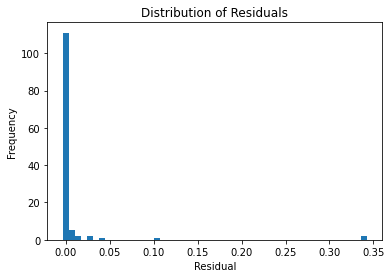

In [25]:
plt.hist(x.value, bins=50)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

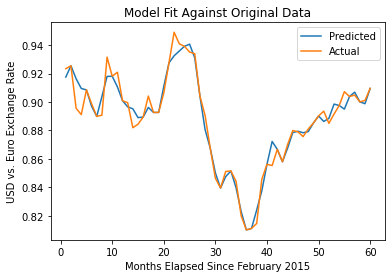

In [26]:
predictions = A @ x.value
plt.plot(range(1, 61), predictions, label='Predicted')
plt.plot(range(1, 61), y, label='Actual')
plt.legend()
plt.xlabel('Months Elapsed Since February 2015')
plt.ylabel('USD vs. Euro Exchange Rate')
plt.title('Model Fit Against Original Data')
plt.show()